In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load CIFAR-10
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# Normalisasi
x_train_full = x_train_full.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Split train jadi train + validation (4:1)
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42
)

print("Train:", x_train.shape)
print("Validation:", x_val.shape)
print("Test:", x_test.shape)

Train: (40000, 32, 32, 3)
Validation: (10000, 32, 32, 3)
Test: (10000, 32, 32, 3)


In [5]:
model1 = models.Sequential()
model1.add(layers.Conv2D(8, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))  # CIFAR-10 → 10 kelas

model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [7]:
model2 = models.Sequential()
model2.add(layers.Conv2D(8, (3, 3), activation='relu'))
model2.add(layers.Conv2D(8, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))  # CIFAR-10 → 10 kelas

model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [10]:
model3 = models.Sequential()
model3.add(layers.Conv2D(8, (3, 3), activation='relu'))
model3.add(layers.Conv2D(8, (3, 3), activation='relu'))
model3.add(layers.Conv2D(8, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(10, activation='softmax'))  # CIFAR-10 → 10 kelas
model3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
def train_model(model):
    history = model.fit(
        x_train, y_train,
        epochs=20,
        validation_data=(x_val, y_val),
        batch_size=64,
        verbose = 1
    )
    return history

In [12]:
history1 = train_model(model1)
history2 = train_model(model2)
history3 = train_model(model3)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3241 - loss: 1.8686 - val_accuracy: 0.4593 - val_loss: 1.4998
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4791 - loss: 1.4596 - val_accuracy: 0.4965 - val_loss: 1.3843
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5215 - loss: 1.3479 - val_accuracy: 0.5314 - val_loss: 1.3092
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5580 - loss: 1.2567 - val_accuracy: 0.5509 - val_loss: 1.2702
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5800 - loss: 1.1903 - val_accuracy: 0.5490 - val_loss: 1.2715
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5952 - loss: 1.1509 - val_accuracy: 0.5752 - val_loss: 1.2128
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6157 - loss: 1.1058 - val_accuracy: 0.5850 - val_loss: 1.2028
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6215 - loss: 1.0818 - val_accuracy: 0.

In [13]:
# Prediksi test set
def predict_with(model):

    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Flatten label test karena aslinya (10000,1)
    y_test_flat = y_test.flatten()

    # Hitung Macro F1
    macro_f1 = f1_score(y_test_flat, y_pred_classes, average='macro')
    print("Macro F1-Score on Test Set:", macro_f1)

In [14]:
predict_with(model1)
predict_with(model2)
predict_with(model3)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   
Macro F1-Score on Test Set: 0.5692352622762392
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Macro F1-Score on Test Set: 0.6229255574219593
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Macro F1-Score on Test Set: 0.5974155422341372


In [15]:
import matplotlib.pyplot as plt

def plot_loss_histories(histories, labels):
    """Membuat grafik training dan validation loss dari beberapa riwayat pelatihan.

    Args:
        histories (list): Daftar objek History (hasil dari model.fit).
        labels (list): Daftar label yang sesuai untuk setiap riwayat.

    Returns:
        None (menampilkan grafik)
    """

    # Grafik Training Loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)  # 1 baris, 2 kolom, grafik pertama
    for history, label in zip(histories, labels):
        plt.plot(history.history['loss'], label=label)
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Grafik Validation Loss
    plt.subplot(1, 2, 2)  # 1 baris, 2 kolom, grafik kedua
    for history, label in zip(histories, labels):
        plt.plot(history.history['val_loss'], label=label)
    plt.title('Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()  # Menyesuaikan tata letak agar tidak tumpang tindih
    plt.show()

# Contoh penggunaan:
# Asumsikan Anda memiliki beberapa model yang sudah dilatih dan
# disimpan dalam variabel history1, history2, dll.

# history1 = model1.fit(...)  # Contoh
# history2 = model2.fit(...)
# ...

# plot_loss_histories([history1, history2], ['Model 1', 'Model 2'])

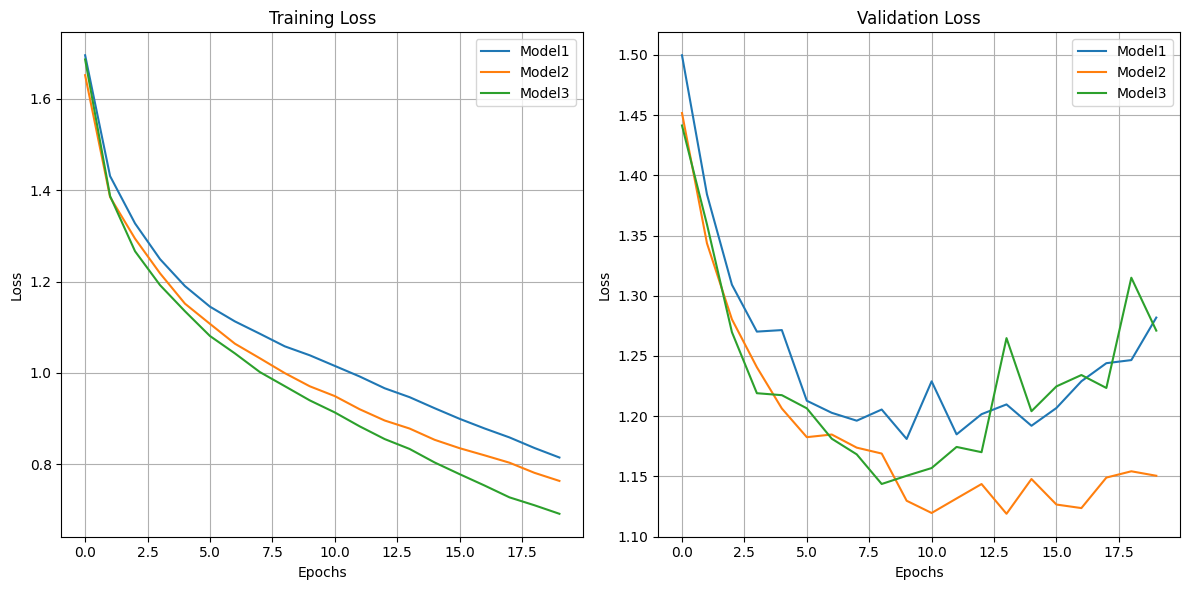

In [16]:
plot_loss_histories([history1,history2,history3],['Model1','Model2','Model3'])

In [17]:
model1.save('../models/test1_model_1.h5')
model2.save('../models/test1_model_2.h5')
model3.save('../models/test1_model_3.h5')

In [ ]:
from load import load_scratch_model
from network import predict

ScratchModel1 = load_scratch_model('../models/test1_model_1.h5')
ScratchModel2= load_scratch_model('../models/test1_model_2.h5')
ScratchModel3 = load_scratch_model('../models/test1_model_3.h5')
